# SIF3012 Final

## Name: Bryan Lim Kien Seng
## Matric Number: 22003500

Importing the necessary libraries, and personalising the plotting:

In [44]:
# Importing required libraries
import numpy as np  # Numerical computations
import matplotlib.pyplot as plt  # Plotting
import pandas as pd  # Data manipulation

# Customizing plot appearance
plt.rcParams['figure.figsize'] = [16, 10]  # Set figure size
plt.rcParams.update({'font.size': 16, 'axes.grid': True})  # Set font size and enable grid

Plotting the graph:

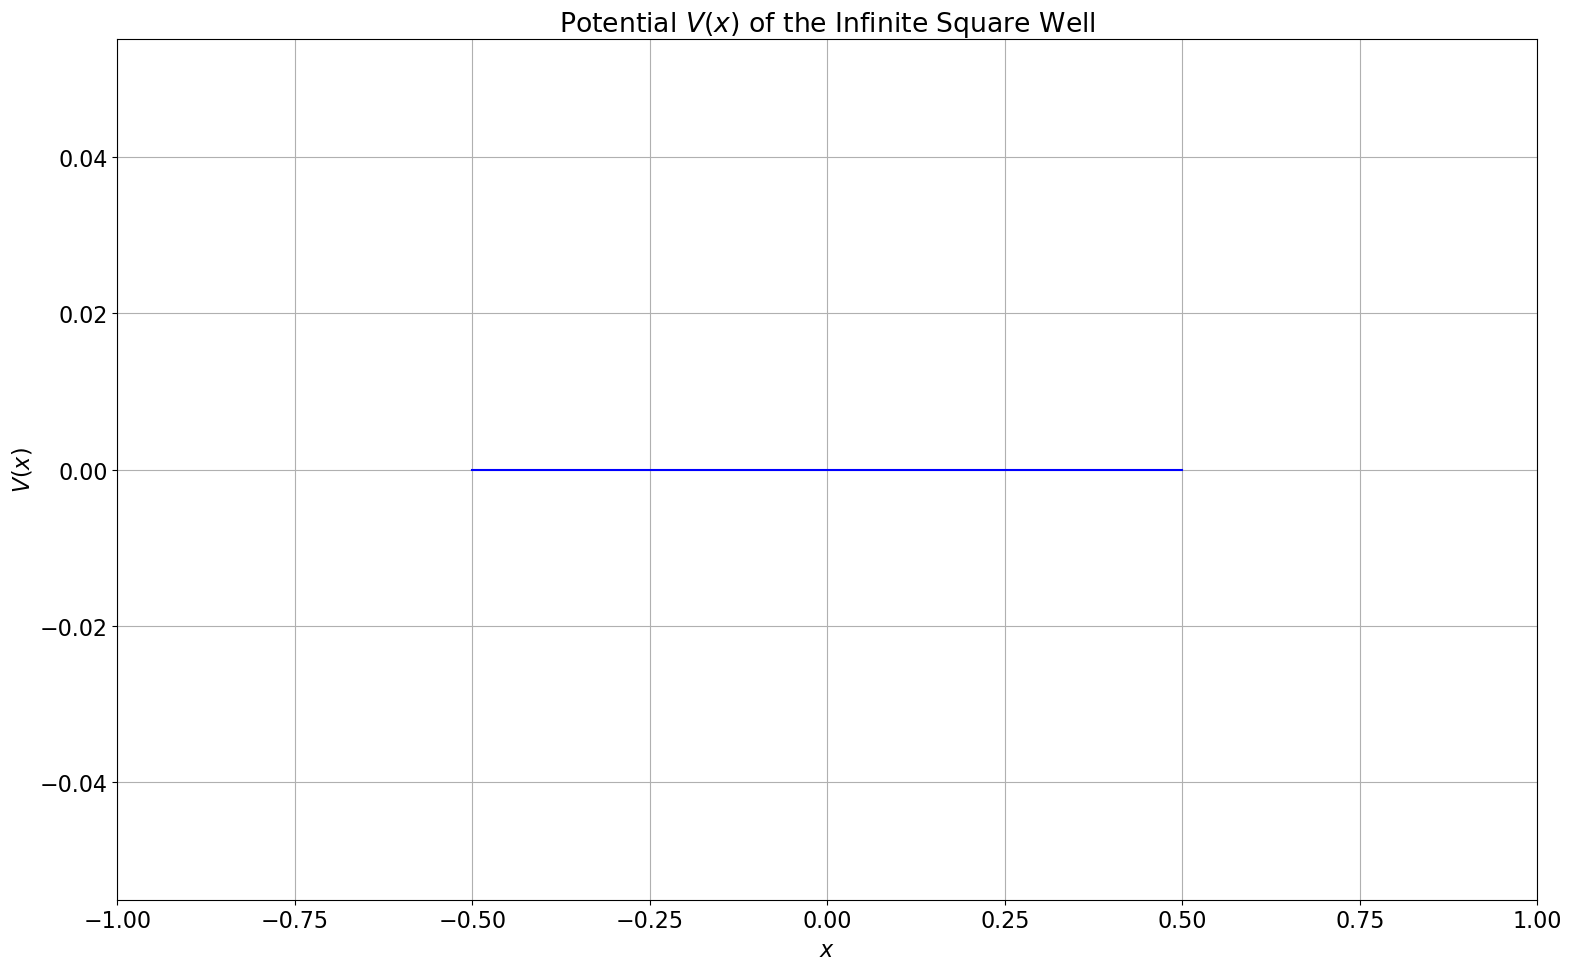

In [45]:
# Constants
hbar_squared_over_m, a = 1, 0.5  # Physical constants

# Defining the symmetric potential well
def V(x, a):
    return np.piecewise(x, [x < -a, (x >= -a) & (x <= a), x > a], [float('inf'), 0, float('inf')])

# Define x values for plotting
x = np.linspace(-a, a, 1000)

# Plot the potential V(x)
plt.plot(x, V(x, a), color='blue')
plt.xlim(-2 * a, 2 * a)
plt.title(rf'Potential $V(x)$ of the Infinite Square Well')
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.tight_layout()  # Ensures labels and titles fit properly
plt.show()

Plotting the wavefunctions of the solution:

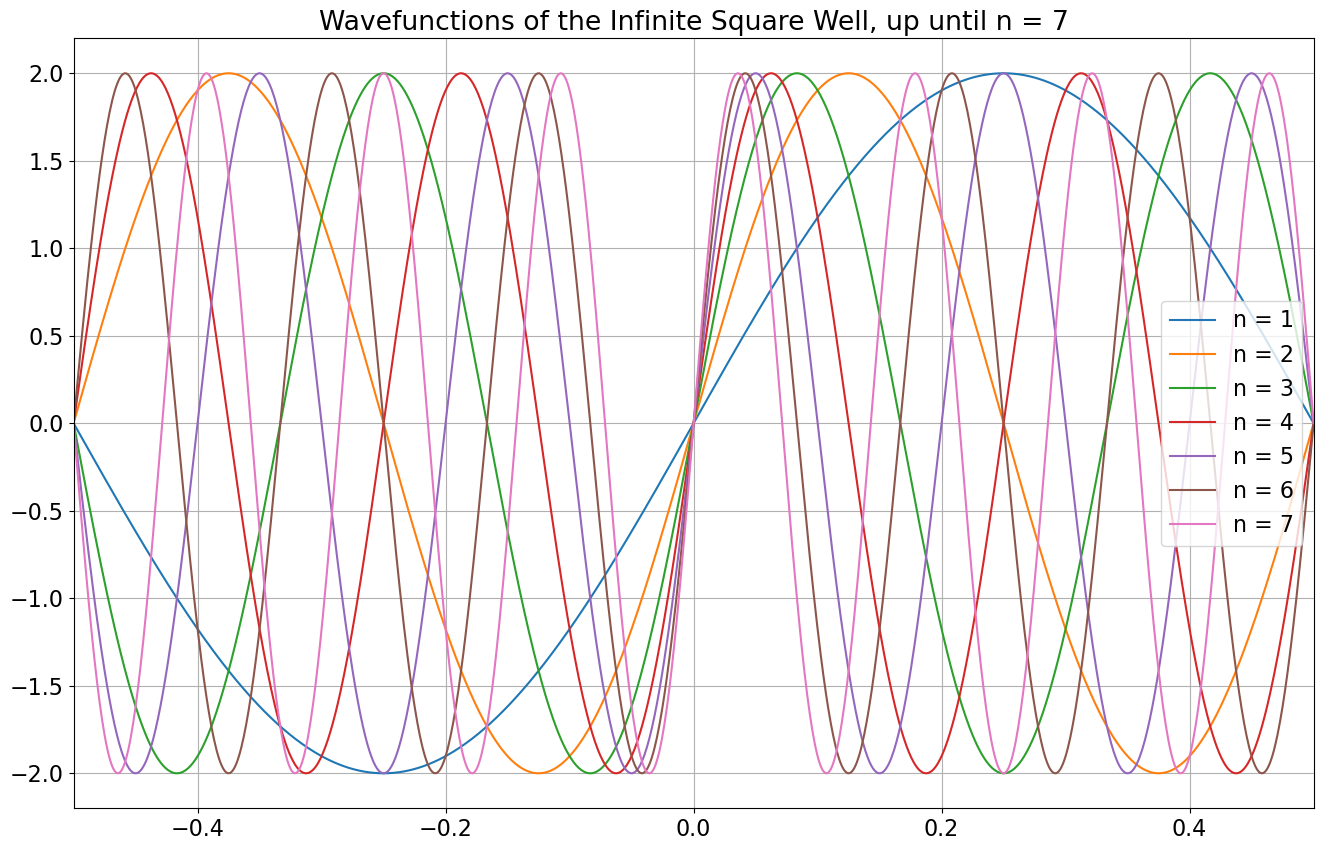

In [52]:
n = 8
a = 0.5

x = np.linspace(-0.5, 0.5, 1000)

for i in range(1, n):
    psi_x = np.sqrt(2 / a) * np.sin(i * np.pi * x / a)
    plt.plot(x, psi_x, label=f'n = {i}')

plt.title(f'Wavefunctions of the Infinite Square Well, up until n = {n - 1}')
plt.xlim(-0.5, 0.5)
plt.legend()
plt.show()

The eigenvalues for each value of n is as shown:

In [53]:
# Printing the first 10 eigenvalues in a table
n = 11
def Eval_exact(n):
    return hbar_squared_over_m * np.pi ** 2 / (8 * a ** 2) * n ** 2

data = []
for i in range(1, n):
    data.append(Eval_exact(i))
    
df = pd.DataFrame(data, columns = ['Eigenvalues'])
df.index = np.arange(1, n)
print(df)

    Eigenvalues
1      4.934802
2     19.739209
3     44.413220
4     78.956835
5    123.370055
6    177.652879
7    241.805308
8    315.827341
9    399.718978
10   493.480220


### Explanation for how the shooting method works in this question

The shooting method is a numerical technique used to solve boundary value problems (BVPs), especially in quantum mechanics, where one often encounters differential equations thatf describe the behavior of wavefunctions in potential wells. The basic idea of the shooting method is to convert the BVP into an initial value problem (IVP) and then iteratively adjust the initial conditions to satisfy the boundary conditions at the other end of the domain.

Below are the steps, or algorithm, in applying the Shooting Method:
1. Formulate the Problem:
    The Schrödinger equation for a particle in an infinite square well is:

    $$\begin{aligned}-\frac{\hbar^2}{2m}\frac{d^2\psi\left(x\right)}{dx^2}&=E\psi\left(x\right) \end{aligned}$$

    For simplicity, we set $\frac{\hbar^2}{2m}=1$, leading to:
    $$\begin{aligned}-\frac{\hbar^2}{2m}\frac{d^2\psi\left(x\right)}{dx^2}&=E\psi\left(x\right) \end{aligned}$$

    Boundary conditions for an infinite square well between $x=−0.5$ and $x=0.5$ are:

    $$\begin{aligned} \psi\left(-0.5\right)=0 \\ \psi\left(0.5\right)=0 \end{aligned}$$

2. Initial Guess:
    Start with an initial guess for the energy eigenvalue $E$ and the initial slope of the wavefunction $\psi′(x)$.

3. Solve the IVP:
    Using a numerical method like the Runge-Kutta 4th order (RK4), solve the Schrödinger equation from $x=−0.5$ to $x=0.5$ with initial conditions:

    $$\begin{aligned} \psi\left(-0.5\right)&=0 \\ \psi'\left(-0.5\right)&=\psi'_0 \end{aligned}$$

    The solution gives the wavefunction $\psi\left(x\right)$ at different points.

4. Check the Boundary Condition:
    After solving the IVP, check the value of $\psi\left(0.5\right)$. If $\psi\left(0.5\right)\ne0$, adjust the guessed energy $E$.

5. Iterative Adjustment:
    Use methods like Newton-Raphsonn to adjust $E$ until $\psi\left(0.5\right)$ is close enough to zero within a specified tolerance, ensuring the boundary condition is satisfied.

### Principle Behind the Shooting Method

The shooting method relies on the principle that a valid solution to the Schrödinger equation must satisfy the boundary conditions at both ends of the well. The eigenvalue is the unknown that makes the wavefunction satisfy both boundary conditions simultaneously.

1. Quantum Mechanics Fundamentals:

    The Schrödinger equation governs the quantum state of a particle. For an infinite square well, the potential inside the well is zero, and the particle is confined within boundaries where the potential is infinitely large outside the well, forcing the wavefunction to be zero at the boundaries.

2. Boundary Conditions:

    The wavefunction $\psi\left(x\right)$ must vanish at the walls of the well (i.e., $\psi\left(-0.5\right)=0$ and $\psi\left(0.5\right)=0$) because the particle cannot exist outside the infinite potential walls.

3. Discrete Energy Levels:

    The particle in a box has quantized energy levels. These correspond to the eigenvalues $E_n$​ that satisfy the boundary conditions, and the wavefunctions $\psi_n\left(x\right)$ are sine functions that have nodes at the boundaries:

    $$\begin{aligned}\psi_n\left(x\right)=\sqrt{\frac{2}{a}}\sin\left(\frac{n\pi x}{a}\right)\end{aligned}$$

    The corresponding energies are:

    $$\begin{aligned}E_n=\frac{\hbar^2\pi^2}{8ma^2}n^2\end{aligned}$$

    Here, $n=1, 2, 3,\dots$ represents the quantum number, and $a$ is the width of the well.

### Code for Shooting method:

How to use: Change 'LSM(h, max_eigenvalues=val)' to compute more eigenvalues.

Note: the code produces 2 times 78.956, so i took one more iteration to find for $n=6$.

Eigenvalue 1: E = 4.934794
Eigenvalue 2: E = 19.739209
Eigenvalue 3: E = 44.413168
Eigenvalue 4: E = 78.956835
Eigenvalue 5: E = 78.956836
Eigenvalue 6: E = 123.370055
Eigenvalue 7: E = 177.652880


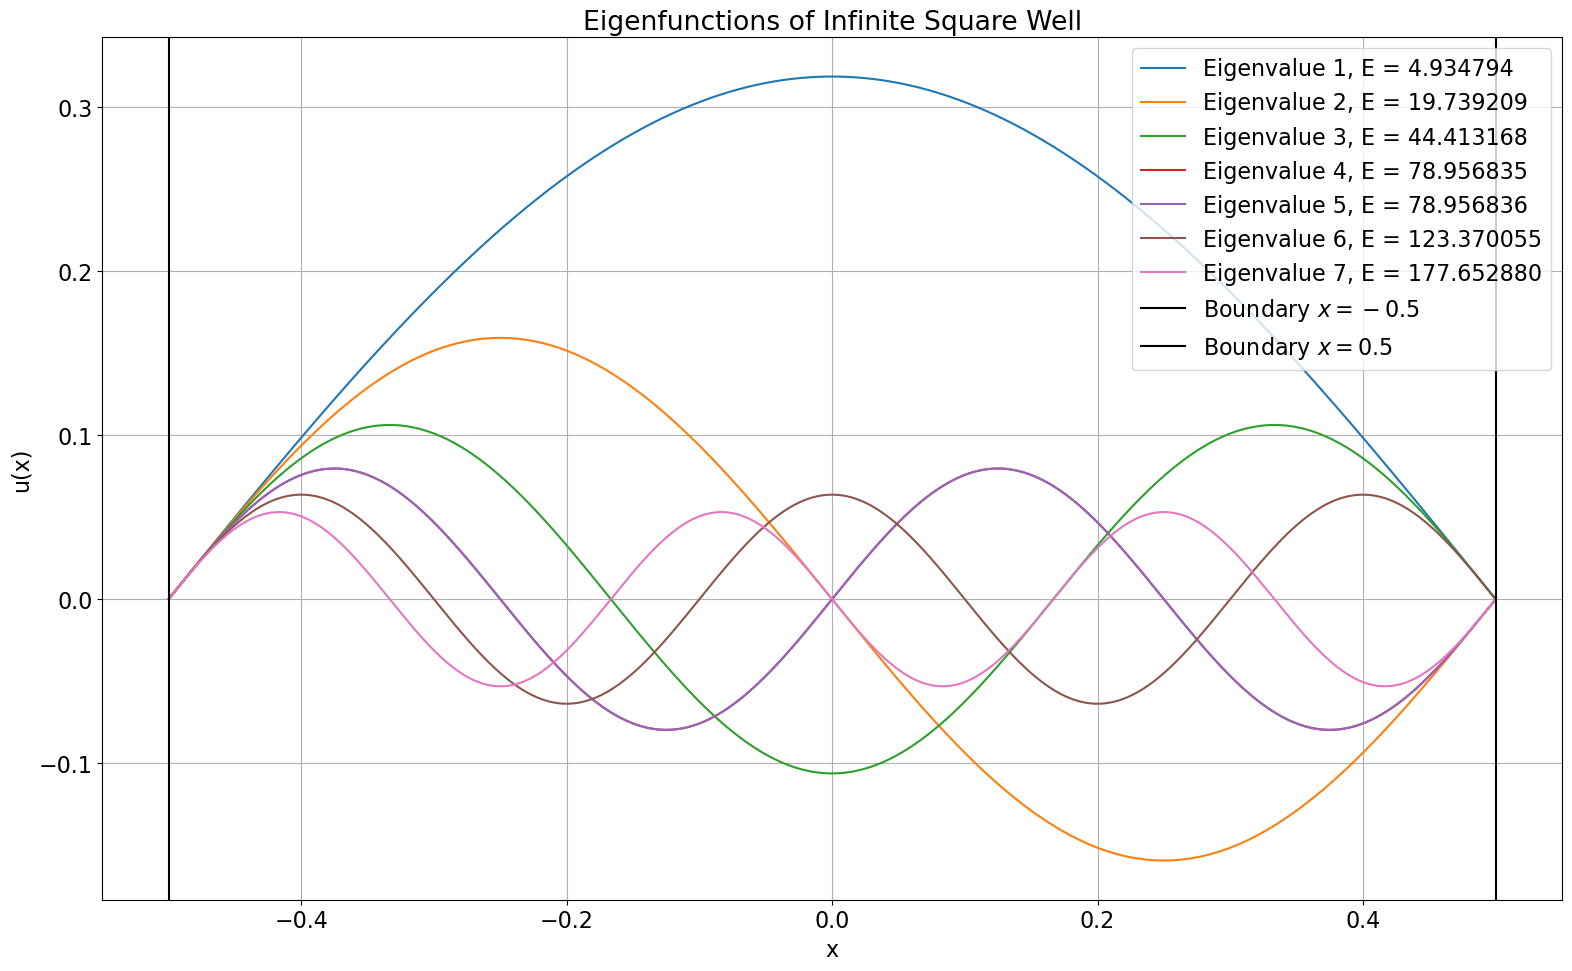

In [55]:
# Constants for the problem
hbar_squared_over_m = 1.0
a, b = -0.5, 0.5  # Boundaries of the well

# Potential function for an infinite square well
def V(x, a):
    return 0  # Inside the well (we only solve inside the well)

# Define the system of ODEs
def f1(x, y1, y2):
    return y2

def f2(x, y1, y2):
    return 2 / hbar_squared_over_m * (V(x, a) - E) * y1

# Parameters for the Boundary Value Problem (BVP)
g_0 = 0  # Wavefunction must be zero at x = a (left boundary)
g_1 = 0  # Wavefunction must be zero at x = b (right boundary)

def count_nodes(y1_values):
    nodes = 0
    for i in range(1, len(y1_values)):
        if y1_values[i-1] * y1_values[i] < 0:
            nodes += 1
    return nodes

def LSM(h, max_eigenvalues=7):
    n = int((b - a) / h)
    found_eigenvalues = []

    # Runge-Kutta 4th order method to solve the system
    def RK4(y1_0, y2_0):
        y1, y2 = y1_0, y2_0
        x = a
        
        x_values = [x]
        y1_values = [y1]
        y2_values = [y2]
        
        for i in range(n):
            k1_y1 = h * f1(x, y1, y2)
            k1_y2 = h * f2(x, y1, y2)

            k2_y1 = h * f1(x + h / 2, y1 + k1_y1 / 2, y2 + k1_y2 / 2)
            k2_y2 = h * f2(x + h / 2, y1 + k1_y1 / 2, y2 + k1_y2 / 2)

            k3_y1 = h * f1(x + h / 2, y1 + k2_y1 / 2, y2 + k2_y2 / 2)
            k3_y2 = h * f2(x + h / 2, y1 + k2_y1 / 2, y2 + k2_y2 / 2)

            k4_y1 = h * f1(x + h, y1 + k3_y1, y2 + k3_y2)
            k4_y2 = h * f2(x + h, y1 + k3_y1, y2 + k3_y2)

            y1 += (k1_y1 + 2 * k2_y1 + 2 * k3_y1 + k4_y1) / 6
            y2 += (k1_y2 + 2 * k2_y2 + 2 * k3_y2 + k4_y2) / 6
            x += h

            x_values.append(x)
            y1_values.append(y1)
            y2_values.append(y2)
        
        return x_values, y1_values, y2_values

    # Newton-Raphson method to adjust the energy level E
    def newton_raphson(y1_0, y2_0, tol=1e-6, max_iter=10):
        global E  # Modify the global energy variable
        for i in range(max_iter):
            x_values, y1_values, y2_values = RK4(y1_0, y2_0)
            residual = y1_values[-1] - g_1  # Check boundary condition at x = b
            if abs(residual) < tol:
                break
            
            delta = 1e-10
            E += delta
            _, y1_values_delta, _ = RK4(y1_0, y2_0)
            residual_prime = (y1_values_delta[-1] - y1_values[-1]) / delta
            E -= delta  # Reset E
            
            E -= residual / residual_prime  # Update energy level E
        
        return x_values, y1_values, y2_values

    y2_0_guess = 1.0  # Guess for the initial slope
    eigenvalue_count = 0
    E_guess = 1.0  # Starting guess for the energy

    while eigenvalue_count < max_eigenvalues:
        global E
        E = E_guess
        x_values, y1_values, y2_values = newton_raphson(g_0, y2_0_guess)
        
        nodes = count_nodes(y1_values)
        if nodes == eigenvalue_count:
            print(f"Eigenvalue {eigenvalue_count + 1}: E = {E:.6f}")
            found_eigenvalues.append(E)
            plt.plot(x_values, y1_values, label=f"Eigenvalue {eigenvalue_count + 1}, E = {E:.6f}")
            eigenvalue_count += 1
        
        E_guess += 5  # Increment the energy guess for the next eigenvalue
    
    plt.axvline(x=a, color='black', linestyle='-', label=f'Boundary $x = {a}$')
    plt.axvline(x=b, color='black', linestyle='-', label=f'Boundary $x = {b}$')
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.legend()
    plt.grid(True)
    plt.title(f"Eigenfunctions of Infinite Square Well")
    plt.tight_layout()
    plt.show()

for h in [0.001]:
    LSM(h)

For the code above, it can be seen that the eigenvalue computed by the shooting method correctly produces the analytical eigenvalues. That signifies that our code is correct in computing the eigenvalues. Also, the smmooth grahps produced by the shooting method (boundary conditions satisfied) gives confidence that our code is correct in producing the eigenfunctions.